## **Importing Required Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import datasets using pandas library

In [17]:
df1=pd.read_csv("/content/EV Maker by Place.csv")
df2=pd.read_csv("/content/OperationalPC.csv")
df3=pd.read_csv("/content/Vehicle Class - All.csv")
df4=pd.read_csv("/content/ev_cat_01-24.csv")
df5=pd.read_csv("/content/ev_sales_by_makers_and_cat_15-24.csv")

In [18]:
print("################  Dataset - 1  ##############")
df1.head()


################  Dataset - 1  ##############


,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [19]:
print("################  Dataset - 2  ##############")
df2.head()


################  Dataset - 2  ##############


,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


In [20]:
print("################  Dataset - 3  ##############")
df3.head()


################  Dataset - 3  ##############


,Vehicle Class,Total Registration
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"


In [21]:
print("################  Dataset - 4  ##############")
df4.head()


################  Dataset - 4  ##############


,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


## Convert the Table According to your requirement

In [22]:
# Convert 'Date' column to datetime objects

df4['Date'] = pd.to_datetime(df4['Date'], format='%d/%m/%y', errors='coerce')

# Now, you can drop rows with NaT in the 'Date' column if you want to exclude invalid dates:
df4 = df4.dropna(subset=['Date'])

# Extract the year from the 'Date' column
df4['Year'] = df4['Date'].dt.year

# Group by year and calculate the sum of sales for each vehicle type
sales_by_year = df4.groupby('Year').agg({
    'FOUR WHEELER (INVALID CARRIAGE)': 'sum',
    'HEAVY GOODS VEHICLE': 'sum',
    'HEAVY MOTOR VEHICLE': 'sum',
    'HEAVY PASSENGER VEHICLE': 'sum',
    'LIGHT GOODS VEHICLE': 'sum',
    'LIGHT MOTOR VEHICLE': 'sum',
    'LIGHT PASSENGER VEHICLE': 'sum',
    'MEDIUM GOODS VEHICLE': 'sum',
    'MEDIUM PASSENGER VEHICLE': 'sum',
    'MEDIUM MOTOR VEHICLE': 'sum',
    'OTHER THAN MENTIONED ABOVE': 'sum',
    'THREE WHEELER(NT)': 'sum',
    'TWO WHEELER (INVALID CARRIAGE)': 'sum',
    'THREE WHEELER(T)': 'sum',
    'TWO WHEELER(NT)': 'sum',
    'TWO WHEELER(T)': 'sum'
}).reset_index()

# Display the table with years as rows and vehicle type sales as columns
sales_by_year

,Year,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0
1,2002,0,8,4,8,1936,197,54,3,0,1,3,0,0,38,164,0
2,2003,0,6,6,1,331,294,18,0,6,1,4,4,0,24,153,0
3,2004,0,8,6,1,103,231,12,0,0,1,3,3,0,30,212,0
4,2005,0,7,6,3,86,230,10,2,5,1,9,3,0,19,792,0
5,2006,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0
6,2007,0,4,30,3,61,404,19,1,0,1,6,0,0,53,2635,0
7,2008,0,8,9,3,38,610,11,3,0,2,7,1,0,25,12058,0
8,2009,0,2,3,0,27,428,8,1,0,2,6,2,0,38,6865,1
9,2010,0,20,5,1,91,389,15,0,0,2,4,2,0,30,4068,1


In [23]:
# Calculate the total vehicle count for each row
sales_by_year['Total Vehicle Count'] = sales_by_year.iloc[:, 1:].sum(axis=1)

# Display the modified dataframe to verify the addition of the new column
sales_by_year

,Year,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T),Total Vehicle Count
0,2001,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0,1622
1,2002,0,8,4,8,1936,197,54,3,0,1,3,0,0,38,164,0,2416
2,2003,0,6,6,1,331,294,18,0,6,1,4,4,0,24,153,0,848
3,2004,0,8,6,1,103,231,12,0,0,1,3,3,0,30,212,0,610
4,2005,0,7,6,3,86,230,10,2,5,1,9,3,0,19,792,0,1173
5,2006,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0,1622
6,2007,0,4,30,3,61,404,19,1,0,1,6,0,0,53,2635,0,3217
7,2008,0,8,9,3,38,610,11,3,0,2,7,1,0,25,12058,0,12775
8,2009,0,2,3,0,27,428,8,1,0,2,6,2,0,38,6865,1,7383
9,2010,0,20,5,1,91,389,15,0,0,2,4,2,0,30,4068,1,4628


In [24]:
print("################  Dataset - 5  ##############")
df5.head()

################  Dataset - 5  ##############


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


## **Data Preprocessing**

In [25]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(62, 3)
(34, 2)
(16, 2)
(283, 18)
(1386, 12)


In [26]:
print("---------------------- Dataset - 1--------------------")
print(df1.describe())
print("---------------------- Dataset -2---------------------")
print(df2.describe())
print("----------------------Dataset - 3----------------------")
print(df3.describe())
print("----------------------Dataset - 4-----------------------")
print(df4.describe())
print("----------------------Dataset - 5-----------------------")
print(df5.describe())

---------------------- Dataset - 1--------------------
                     EV Maker Place        State
count                      62    62           62
unique                     61    36           13
top     Lohia Auto Industries  Pune  Maharashtra
freq                        2     7           15
---------------------- Dataset -2---------------------
       No. of Operational PCS
count               34.000000
mean               357.235294
std                617.579099
min                  1.000000
25%                 18.750000
50%                129.500000
75%                451.250000
max               3079.000000
----------------------Dataset - 3----------------------
                          Vehicle Class Total Registration
count                                16                 16
unique                               16                 16
top     FOUR WHEELER (INVALID CARRIAGE)             21,346
freq                                  1                  1
----------------------Da

Checking missing fields

In [27]:
print("---------------------- Dataset - 1--------------------")
print(df1.isnull().sum())
print("---------------------- Dataset -2---------------------")
print(df2.isnull().sum())
print("----------------------Dataset - 3----------------------")
print(df3.isnull().sum())
print("----------------------Dataset - 4-----------------------")
print(df4.isnull().sum())
print("----------------------Dataset - 5-----------------------")
print(df5.isnull().sum())

---------------------- Dataset - 1--------------------
EV Maker    0
Place       0
State       0
dtype: int64
---------------------- Dataset -2---------------------
State                     0
No. of Operational PCS    0
dtype: int64
----------------------Dataset - 3----------------------
Vehicle Class         0
Total Registration    0
dtype: int64
----------------------Dataset - 4-----------------------
Date                               0
FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0


In [28]:
print("---------------------- Dataset - 1--------------------")
print(df1.info())
print("---------------------- Dataset -2---------------------")
print(df2.info())
print("----------------------Dataset - 3----------------------")
print(df3.info())
print("----------------------Dataset - 4-----------------------")
print(df4.info())
print("----------------------Dataset - 5-----------------------")
print(df5.info())

---------------------- Dataset - 1--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None
---------------------- Dataset -2---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes
None
----------------------Dataset - 3----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              

## **`Implementing EDA on Datasets`**

Constructing a Barplot for State wise number of EV makers and Number of Places from dataset df1

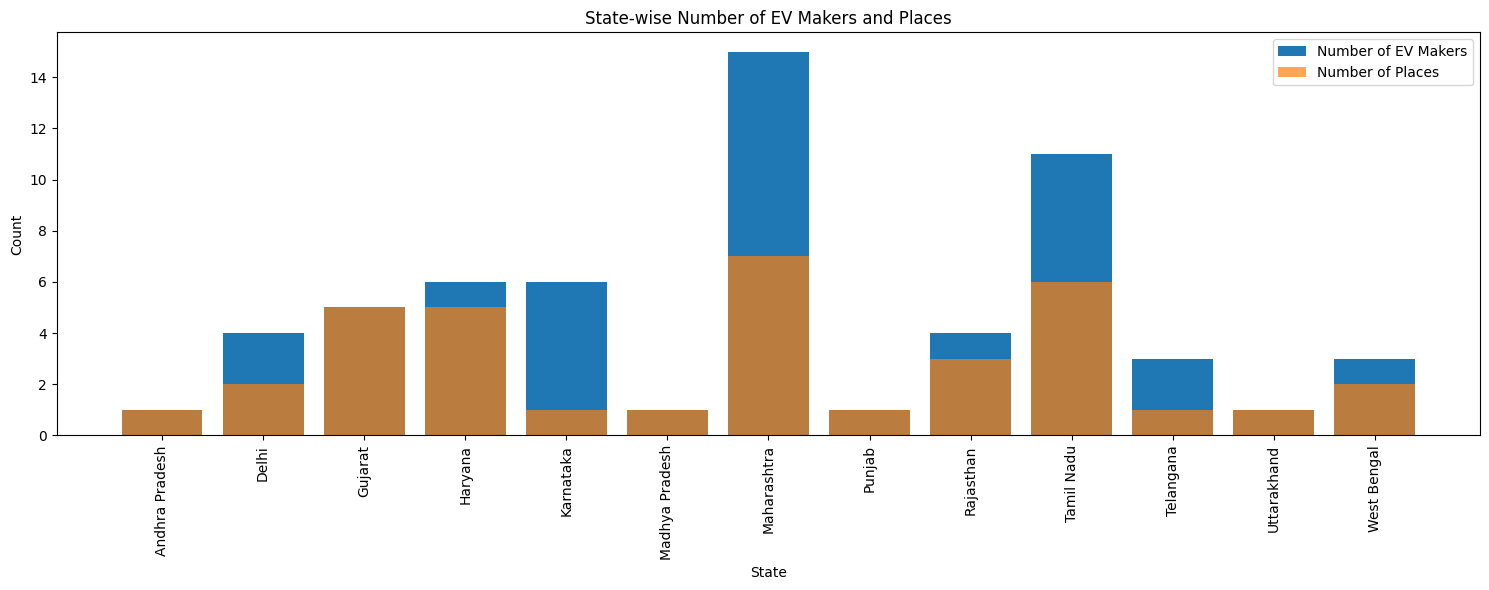

In [29]:
# Group by state and count the number of EV makers and places
# Use a list instead of a tuple to select multiple columns
state_wise_data = df1.groupby('State')[['EV Maker', 'Place']].nunique()

# Reset the index to make 'State' a regular column
state_wise_data = state_wise_data.reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(state_wise_data['State'], state_wise_data['EV Maker'], label='Number of EV Makers')
plt.bar(state_wise_data['State'], state_wise_data['Place'], label='Number of Places', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Number of EV Makers and Places')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Operational public charging refers to the active and functional charging stations available for electric vehicles (EVs) in public locations, allowing EV users to charge their vehicles while away from home or their usual charging spot

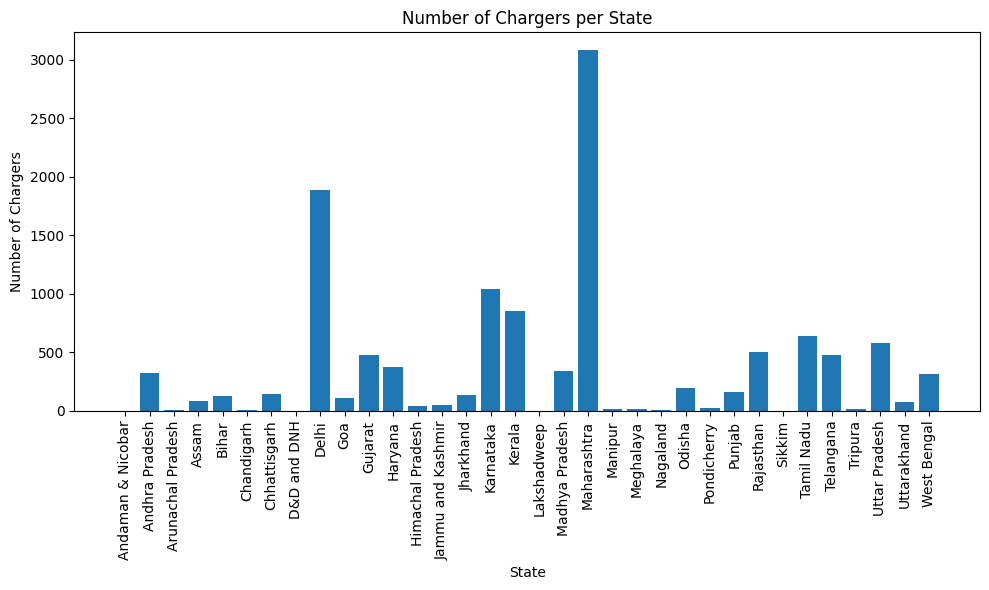

In [30]:
# plot a barplot from df2 (OperationalPC.csv)

# Plotting the barplot for the 'Number of Operational' column
plt.figure(figsize=(10, 6))
plt.bar(df2['State'], df2['No. of Operational PCS'])
plt.xlabel('State')
plt.ylabel('Number of Chargers')
plt.title('Number of Chargers per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

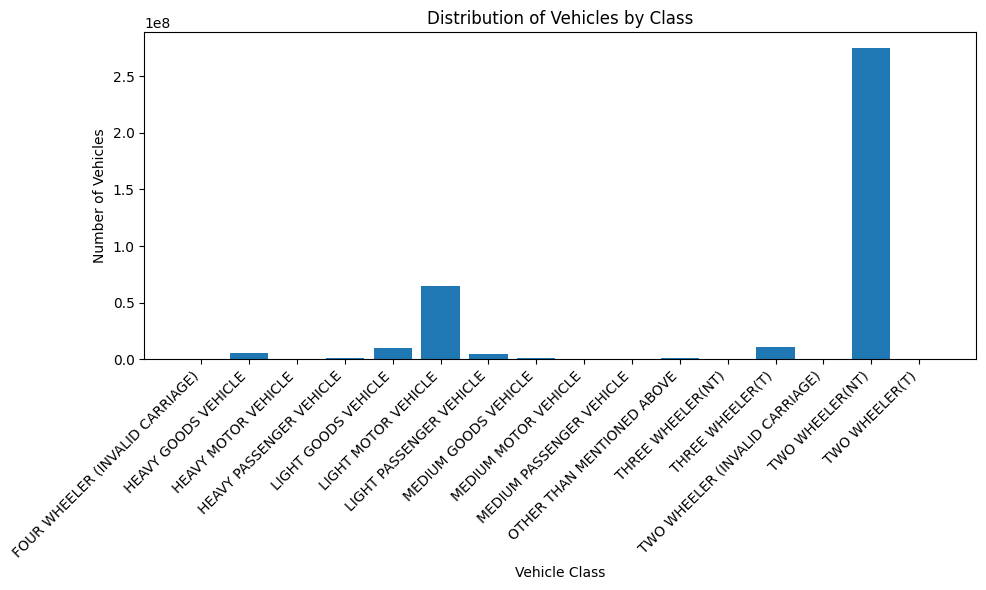

In [31]:
# Visualisation for Dataset 3 (Vehicle Class - All.csv)

# Group by Vehicle Class and count the number of vehicles
# Convert 'Total Registration' to numeric before summing
df3['Total Registration'] = df3['Total Registration'].str.replace(',', '').astype(int)  # Remove commas and convert to integers
vehicle_class_counts = df3.groupby('Vehicle Class')['Total Registration'].sum()

# bar chart for better readability with labels
plt.figure(figsize=(10, 6))
plt.bar(vehicle_class_counts.index, vehicle_class_counts.values)
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# from df4 dataset
sales_by_year.head()


,Year,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T),Total Vehicle Count
0,2001,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0,1622
1,2002,0,8,4,8,1936,197,54,3,0,1,3,0,0,38,164,0,2416
2,2003,0,6,6,1,331,294,18,0,6,1,4,4,0,24,153,0,848
3,2004,0,8,6,1,103,231,12,0,0,1,3,3,0,30,212,0,610
4,2005,0,7,6,3,86,230,10,2,5,1,9,3,0,19,792,0,1173


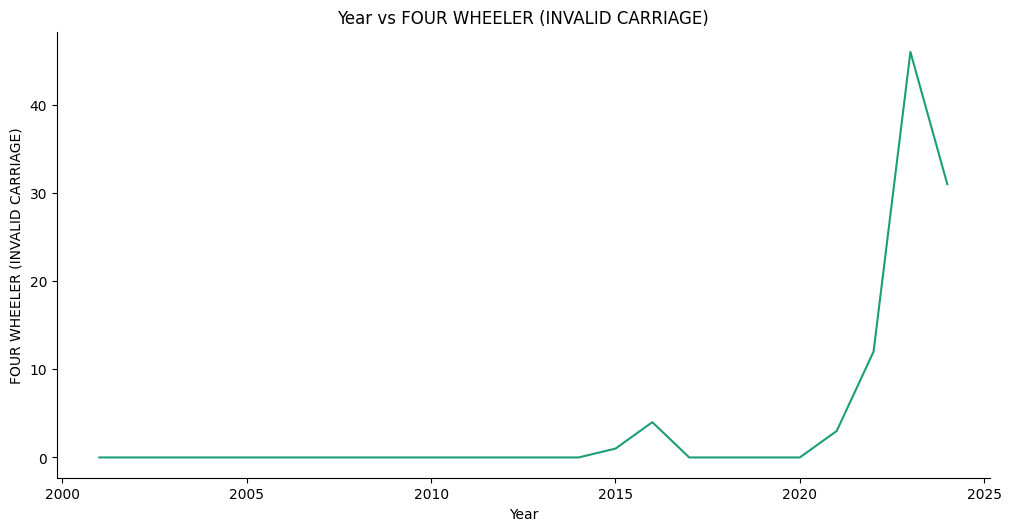

In [33]:
#Year vs FOUR WHEELER (INVALID CARRIAGE)
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['FOUR WHEELER (INVALID CARRIAGE)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_by_year.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
plt.title('Year vs FOUR WHEELER (INVALID CARRIAGE)')
_ = plt.ylabel('FOUR WHEELER (INVALID CARRIAGE)')

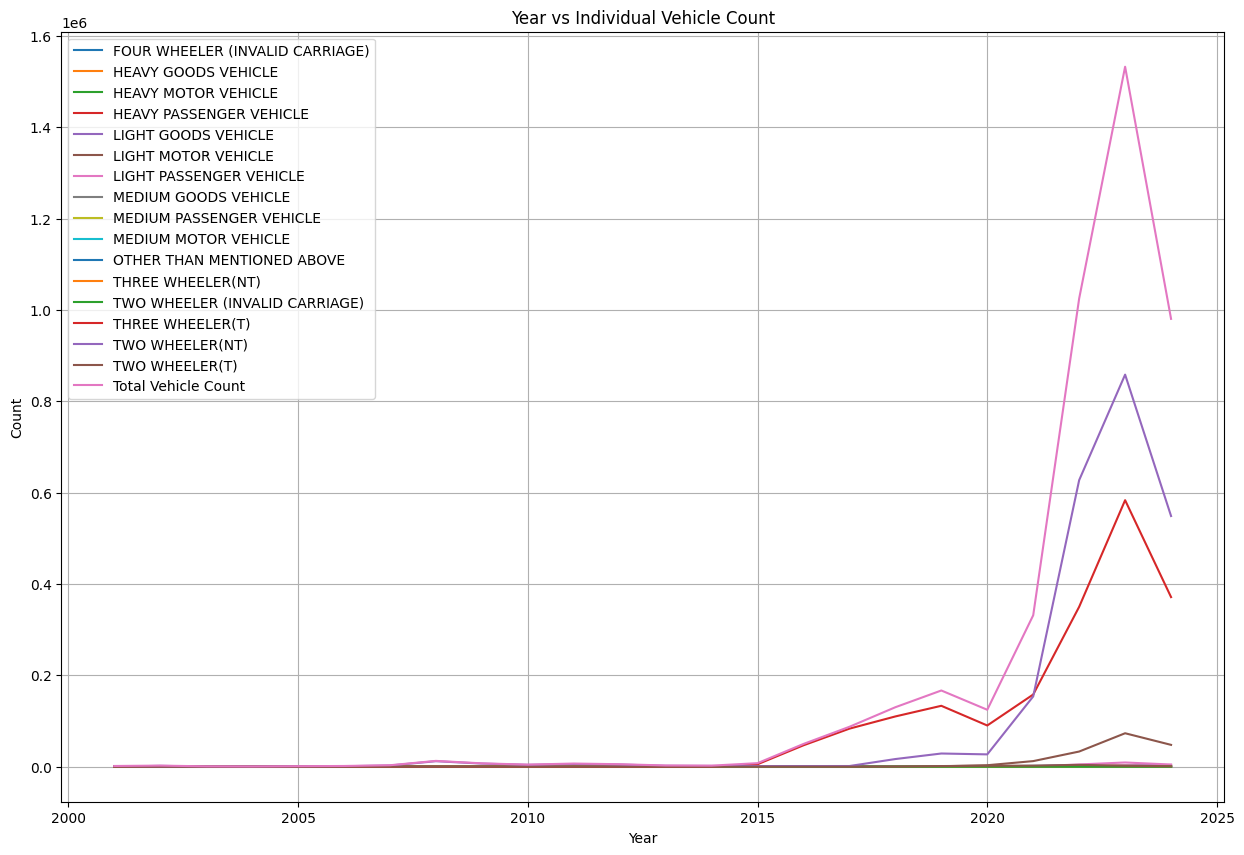

In [34]:
#df4
# Reshape the dataframe to have a column for 'Vehicle Type' and a column for 'Count'
sales_melted = pd.melt(sales_by_year, id_vars=['Year'], var_name='Vehicle Type', value_name='Count')

# Plot the line graph using matplotlib
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

for vehicle_type in sales_melted['Vehicle Type'].unique():
    data_subset = sales_melted[sales_melted['Vehicle Type'] == vehicle_type]
    plt.plot(data_subset['Year'], data_subset['Count'], label=vehicle_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year vs Individual Vehicle Count')
plt.legend(loc='upper left')  # Adjust legend location if needed
plt.grid(True)
plt.show()

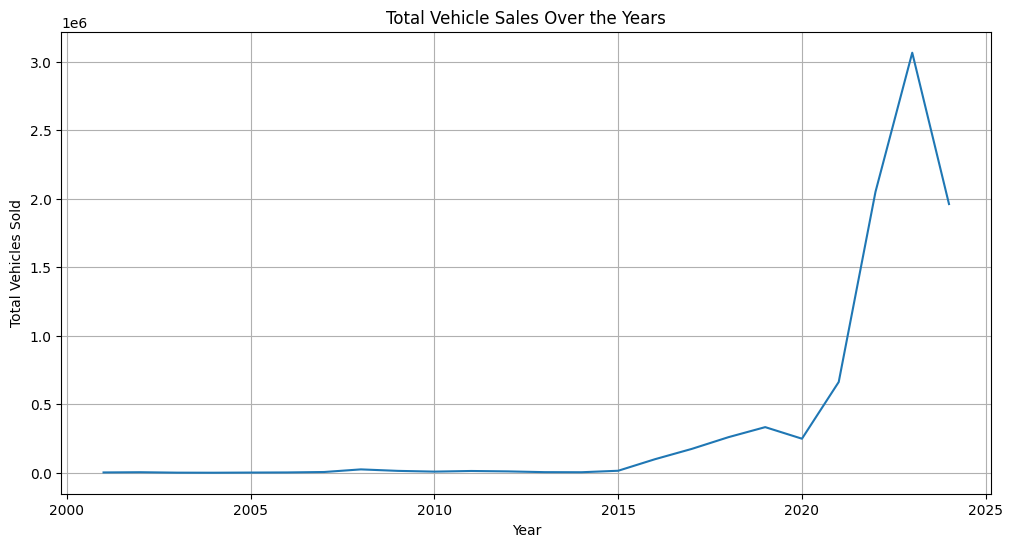

In [35]:
# Calculate total vehicles sold for each year
sales_by_year['Total Vehicles'] = sales_by_year.drop(columns=['Year']).sum(axis=1) # sum across all vehicle types for each year

# Plot line plot of total vehicles sold over the years
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Total Vehicles'])  # Now using the calculated 'Total Vehicles' column
plt.xlabel('Year')
plt.ylabel('Total Vehicles Sold')
plt.title('Total Vehicle Sales Over the Years')
plt.grid(True)
plt.show()

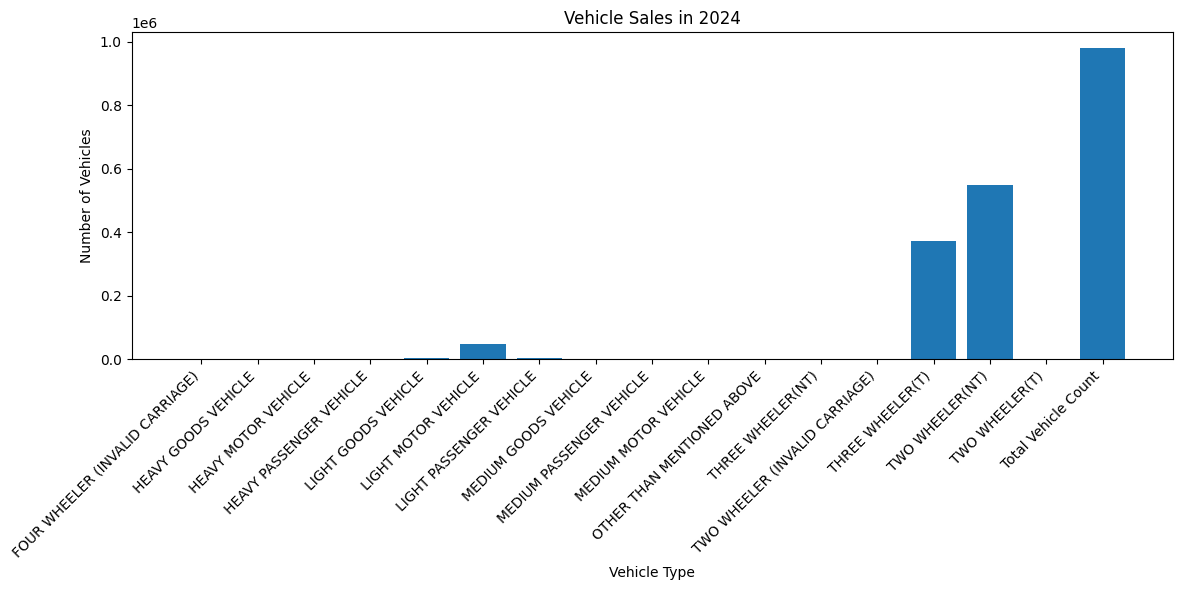

In [36]:
# 2024 vehicle graph

# Filter data for the year 2024
sales_2024 = sales_by_year[sales_by_year['Year'] == 2024]

# Extract the vehicle types and their corresponding counts for 2024
vehicle_types_2024 = sales_2024.columns[1:-1]  # Exclude 'Year' and 'Total Vehicle Count'
counts_2024 = sales_2024.iloc[0, 1:-1]  # Get the counts for 2024

# Create the graph (e.g., a bar chart)
plt.figure(figsize=(12, 6))
plt.bar(vehicle_types_2024, counts_2024)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.title('Vehicle Sales in 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

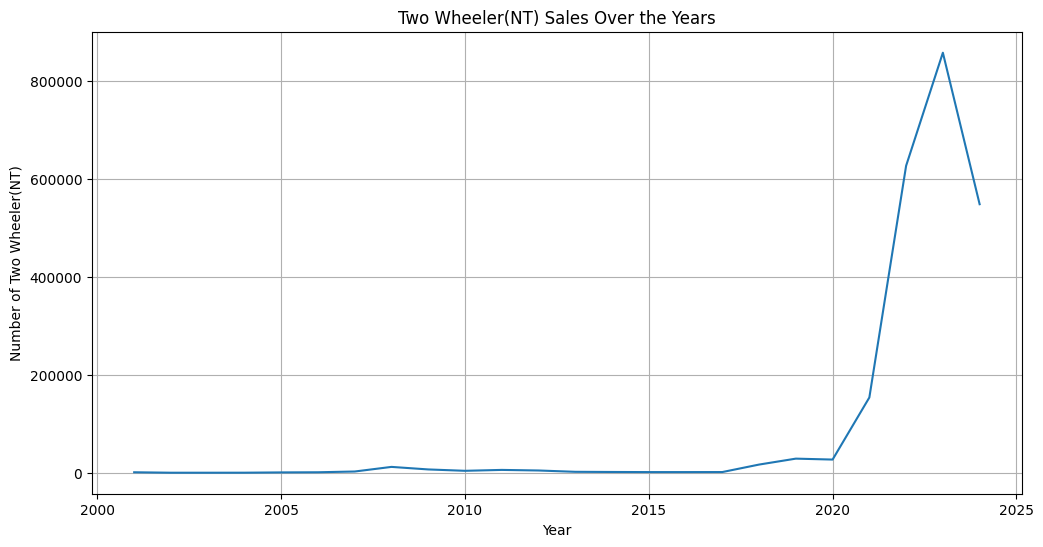

In [37]:
#plot a graph for two wheeler(NT) over the years

plt.figure(figsize=(12, 6))
plt.plot(sales_by_year['Year'], sales_by_year['TWO WHEELER(NT)'])
plt.xlabel('Year')
plt.ylabel('Number of Two Wheeler(NT)')
plt.title('Two Wheeler(NT) Sales Over the Years')
plt.grid(True)
plt.show()

In [38]:
# Group by 'Cat' and count the number of 'Makers'  in df5
makers_count_by_cat = df5.groupby('Cat')['Maker'].count()

makers_count_by_cat

,Maker
Cat,
2W,261
3W,866
LMV,242
MMV,17


In [39]:
# Create a list of years from 2015 to 2024 (as strings to match column names)
years = [str(year) for year in range(2015, 2025)]

# Create an empty dictionary to store the data for the table
table_data = {}

# Iterate through the years
for year in years:
    # Create a dictionary to store the counts for each 'Cat' in this year
    year_counts = {}
    for cat in df5['Cat'].unique():
        # Filter the DataFrame for the current 'Cat' and year
        # Sum the values in the year column for the filtered rows
        count = df5[df5['Cat'] == cat][year].sum()
        year_counts[cat] = count  # Store the count for this 'Cat'

    table_data[year] = year_counts  # Store the counts for this year


# Convert the table data to a Pandas DataFrame
df_table = pd.DataFrame(table_data).T  # Transpose to get years as rows

# Display the table
df_table



,3W,2W,LMV,MMV
2015,5415,1439,892,6
2016,46905,1444,896,4
2017,83350,1525,2140,4
2018,110179,17075,2497,12
2019,133496,30376,1784,130
2020,90386,29123,4226,35
2021,158258,156324,14018,254
2022,350546,631393,38569,25
2023,583712,860398,84829,295
2024,372016,550351,56537,39


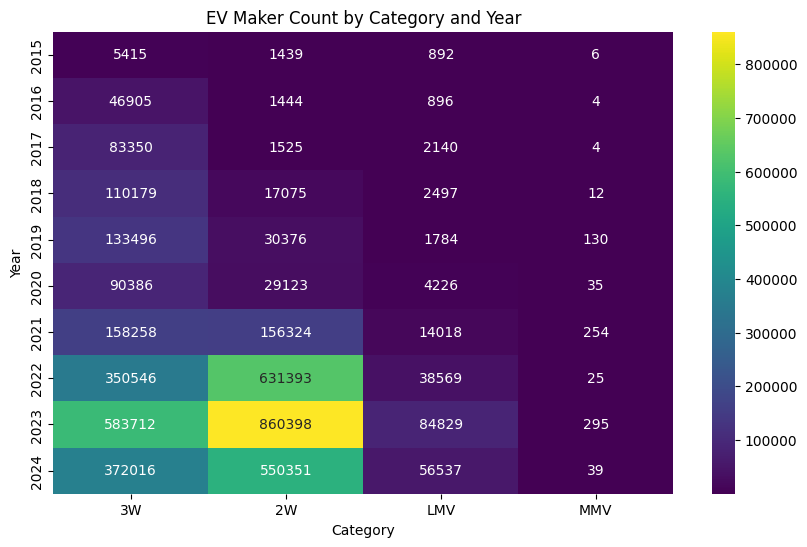

In [40]:
# You can also visualize this table using a heatmap or other plot types
# For example, you can create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_table, annot=True, fmt="d", cmap="viridis")
plt.title("EV Maker Count by Category and Year")
plt.xlabel("Category")
plt.ylabel("Year")
plt.show()

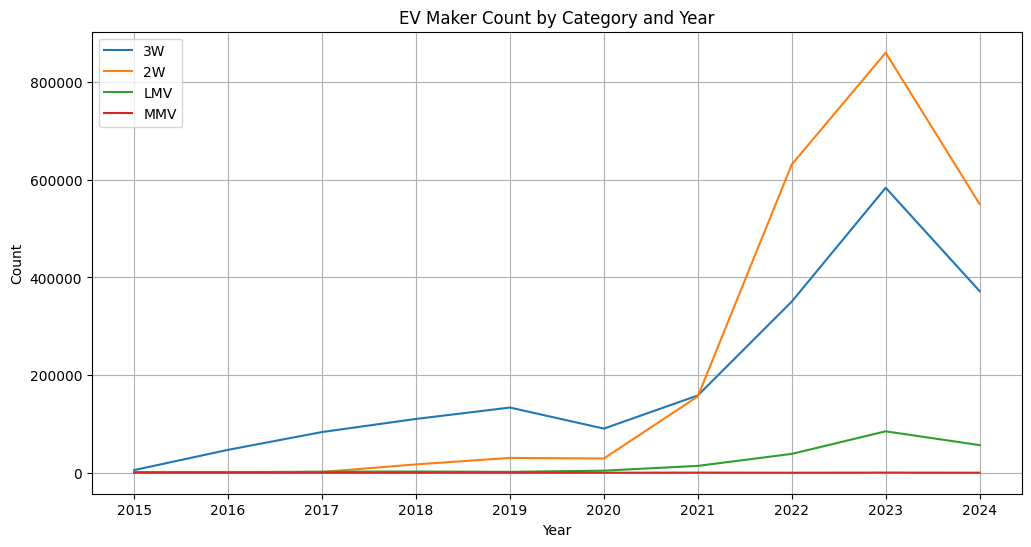

In [41]:
# Plotting all lines in one graph with title and legends  -- df5
plt.figure(figsize=(12, 6))

for column in df_table.columns:
  plt.plot(df_table.index, df_table[column], label=column)

plt.title('EV Maker Count by Category and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()